In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('resources/csgo_round_snapshots.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [3]:
df['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [4]:
label_encoder = preprocessing.LabelEncoder()
df['map'] = label_encoder.fit_transform(df['map'])
df['map'].unique()

array([1, 3, 4, 2, 5, 7, 6, 0])

In [5]:
df['bomb_planted'].unique()

array([False,  True])

In [6]:
df['bomb_planted'] = df['bomb_planted'].astype(int)
df['bomb_planted'].unique()

array([0, 1])

In [7]:
df['round_winner'].unique()

array(['CT', 'T'], dtype=object)

In [8]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])
df['round_winner'].unique()

array([0, 1])

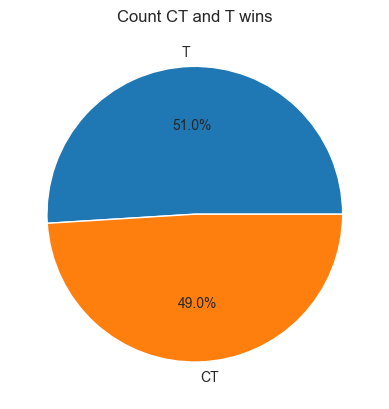

In [9]:
count = df['round_winner'].value_counts()
count.index = count.index.map({0: 'CT', 1: 'T'})
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('Count CT and T wins')
plt.show()

In [10]:
ct_kits_when_win = df[df['round_winner'] == 0]['ct_defuse_kits']
ct_kits_when_lose = df[df['round_winner'] == 1]['ct_defuse_kits']

plt.boxplot([ct_kits_when_win, ct_kits_when_lose], labels=['Win', 'Lose'])
plt.xlabel('Result')
plt.ylabel('Number of Kits')
plt.title('Number of Kits when CT wins and loses')
plt.show()

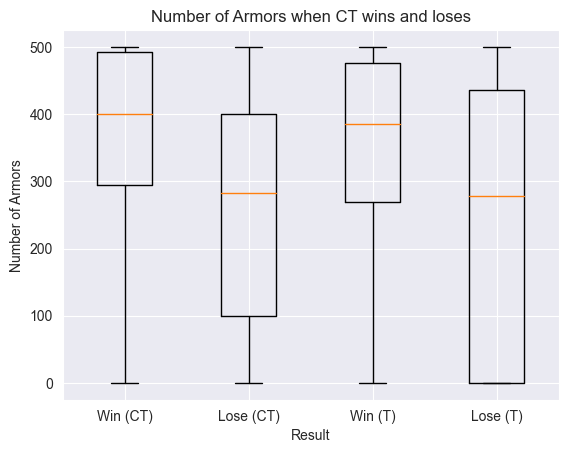

In [11]:
ct_armors_when_win = df[df['round_winner'] == 0]['ct_armor']
ct_armors_when_lose = df[df['round_winner'] == 1]['ct_armor']
t_armors_when_win = df[df['round_winner'] == 1]['t_armor']
t_armors_when_lose = df[df['round_winner'] == 0]['t_armor']

plt.boxplot([ct_armors_when_win, ct_armors_when_lose, t_armors_when_win, t_armors_when_lose],
            labels=['Win (CT)', 'Lose (CT)', 'Win (T)', 'Lose (T)'])
plt.xlabel('Result')
plt.ylabel('Number of Armors')
plt.title('Number of Armors when CT wins and loses')
plt.show()

In [12]:
df.sample(5)

time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
47308       69.95       5.0      2.0    1             0      500.0     500.0   
79677        6.46       6.0      7.0    1             1      300.0     478.0   
20891      169.95      11.0     13.0    1             0      500.0     500.0   
75781      174.91      11.0      7.0    7             0      500.0     500.0   
114643     166.92       2.0      7.0    7             0      500.0     500.0   

        ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
47308      499.0    200.0   16200.0  ...                  1.0   
79677      293.0    492.0    6550.0  ...                  2.0   
20891      396.0      0.0   21450.0  ...                  0.0   
75781      100.0    275.0   18100.0  ...                  3.0   
114643     185.0      0.0   29250.0  ...                  0.0   

        ct_grenade_smokegrenade  t_grenade_smokegrenade  \
47308                       3.0                     0.0   
79677                       0.0                     3.0   
20891                       1.0                     0.0   
75781                       0.0                     0.0   
114643                      1.0                     0.0   

        ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
47308                            4.0                          0.0   
79677                            2.0                          0.0   
20891                            0.0                          0.0   
75781                            0.0                          0.0   
114643                           0.0                          0.0   

        ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
47308                         0.0                       0.0   
79677                         0.0                       0.0   
20891                         0.0                       0.0   
75781                         0.0                       0.0   
114643                        1.0                       0.0   

        ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
47308                       0.0                     0.0             0  
79677                       0.0                     1.0             1  
20891                       0.0                     0.0             0  
75781                       0.0                     0.0             1  
114643                      0.0                     0.0             0  

[5 rows x 97 columns]

In [13]:
# prefixes = ['ct', 't']
#
# for prefix in prefixes:
#     cols = [x for x in df.columns if x.startswith(f'{prefix}_grenade')]
#     temp = df[cols]
#     df.drop(cols, axis=1, inplace=True)
#     df[f'{prefix}_grenade_count'] = temp.sum(axis=1)
#
# df.sample(5)

In [14]:
# weapon_prices = pd.read_csv('resources/weapon_prices.csv')
#
# for prefix in prefixes:
#     cols = [x for x in df.columns if x.startswith(f'{prefix}_weapon')]
#     prefix_size = len(f"{prefix}_weapon_")
#     for col in cols:
#         weight = weapon_prices[weapon_prices['name'] == col[prefix_size:]]['price'].values[0] / 100
#         df[col] *= weight
#     temp = df[cols]
#     df.drop(cols, axis=1, inplace=True)
#     df[f'{prefix}_weapon_weight'] = temp.sum(axis=1)
#
# df.sample(5)

In [15]:
# df['ct_avg_health'] = df['ct_health'] / 5
# df['t_avg_health'] = df['t_health'] / 5
# df.drop(['ct_health', 't_health', 'ct_players_alive', 't_players_alive'], axis=1, inplace=True)
# df['ct_avg_health'].head(5)

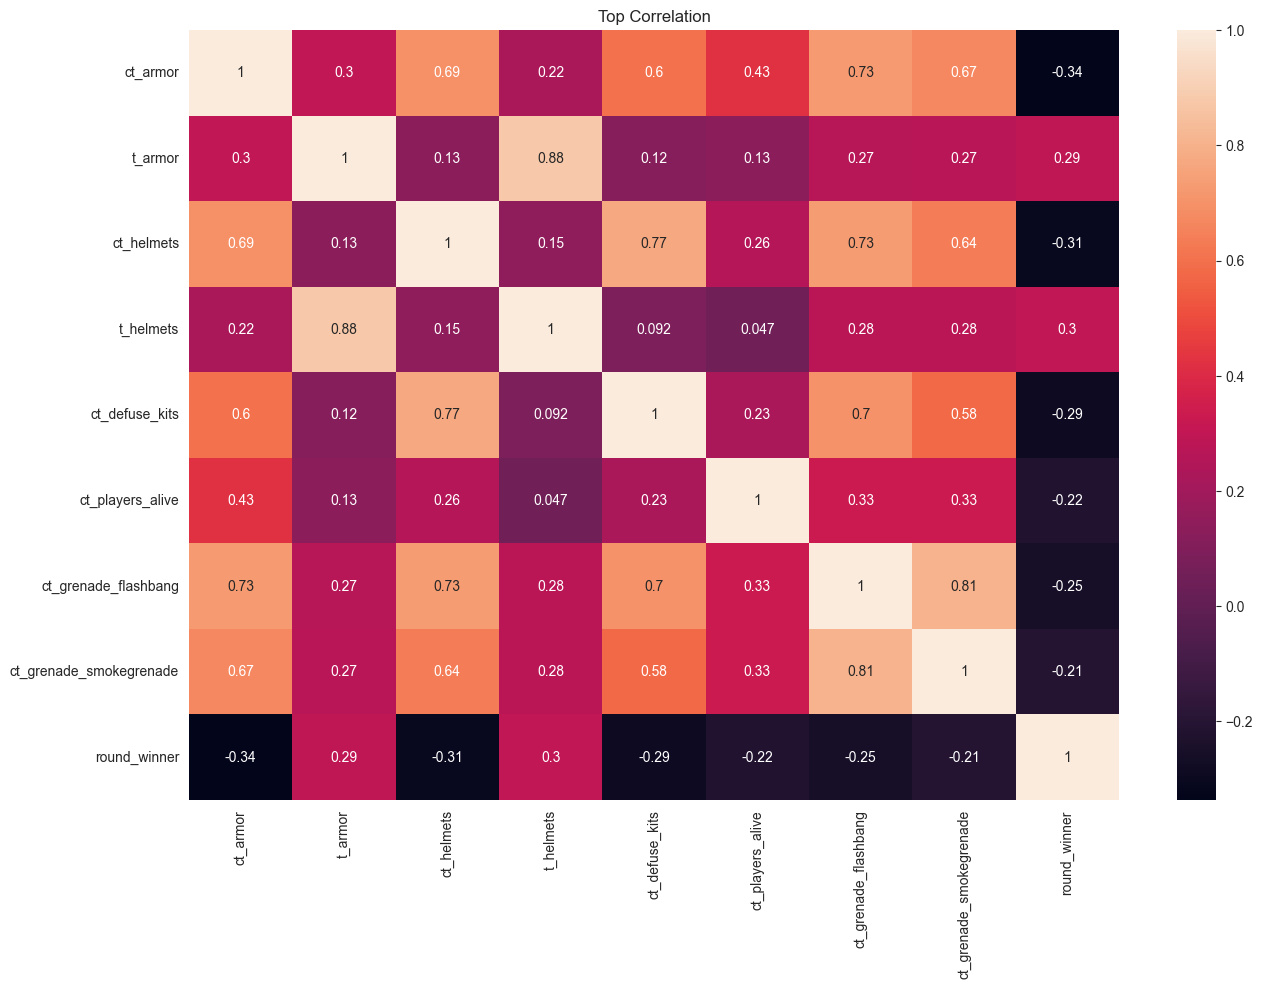

In [16]:
correlation_matrix = df.corr()
top_correlation_cols = correlation_matrix[abs(correlation_matrix['round_winner']) > 0.20].index

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.loc[top_correlation_cols, top_correlation_cols], annot=True)

plt.title(f'Top Correlation')
plt.show()

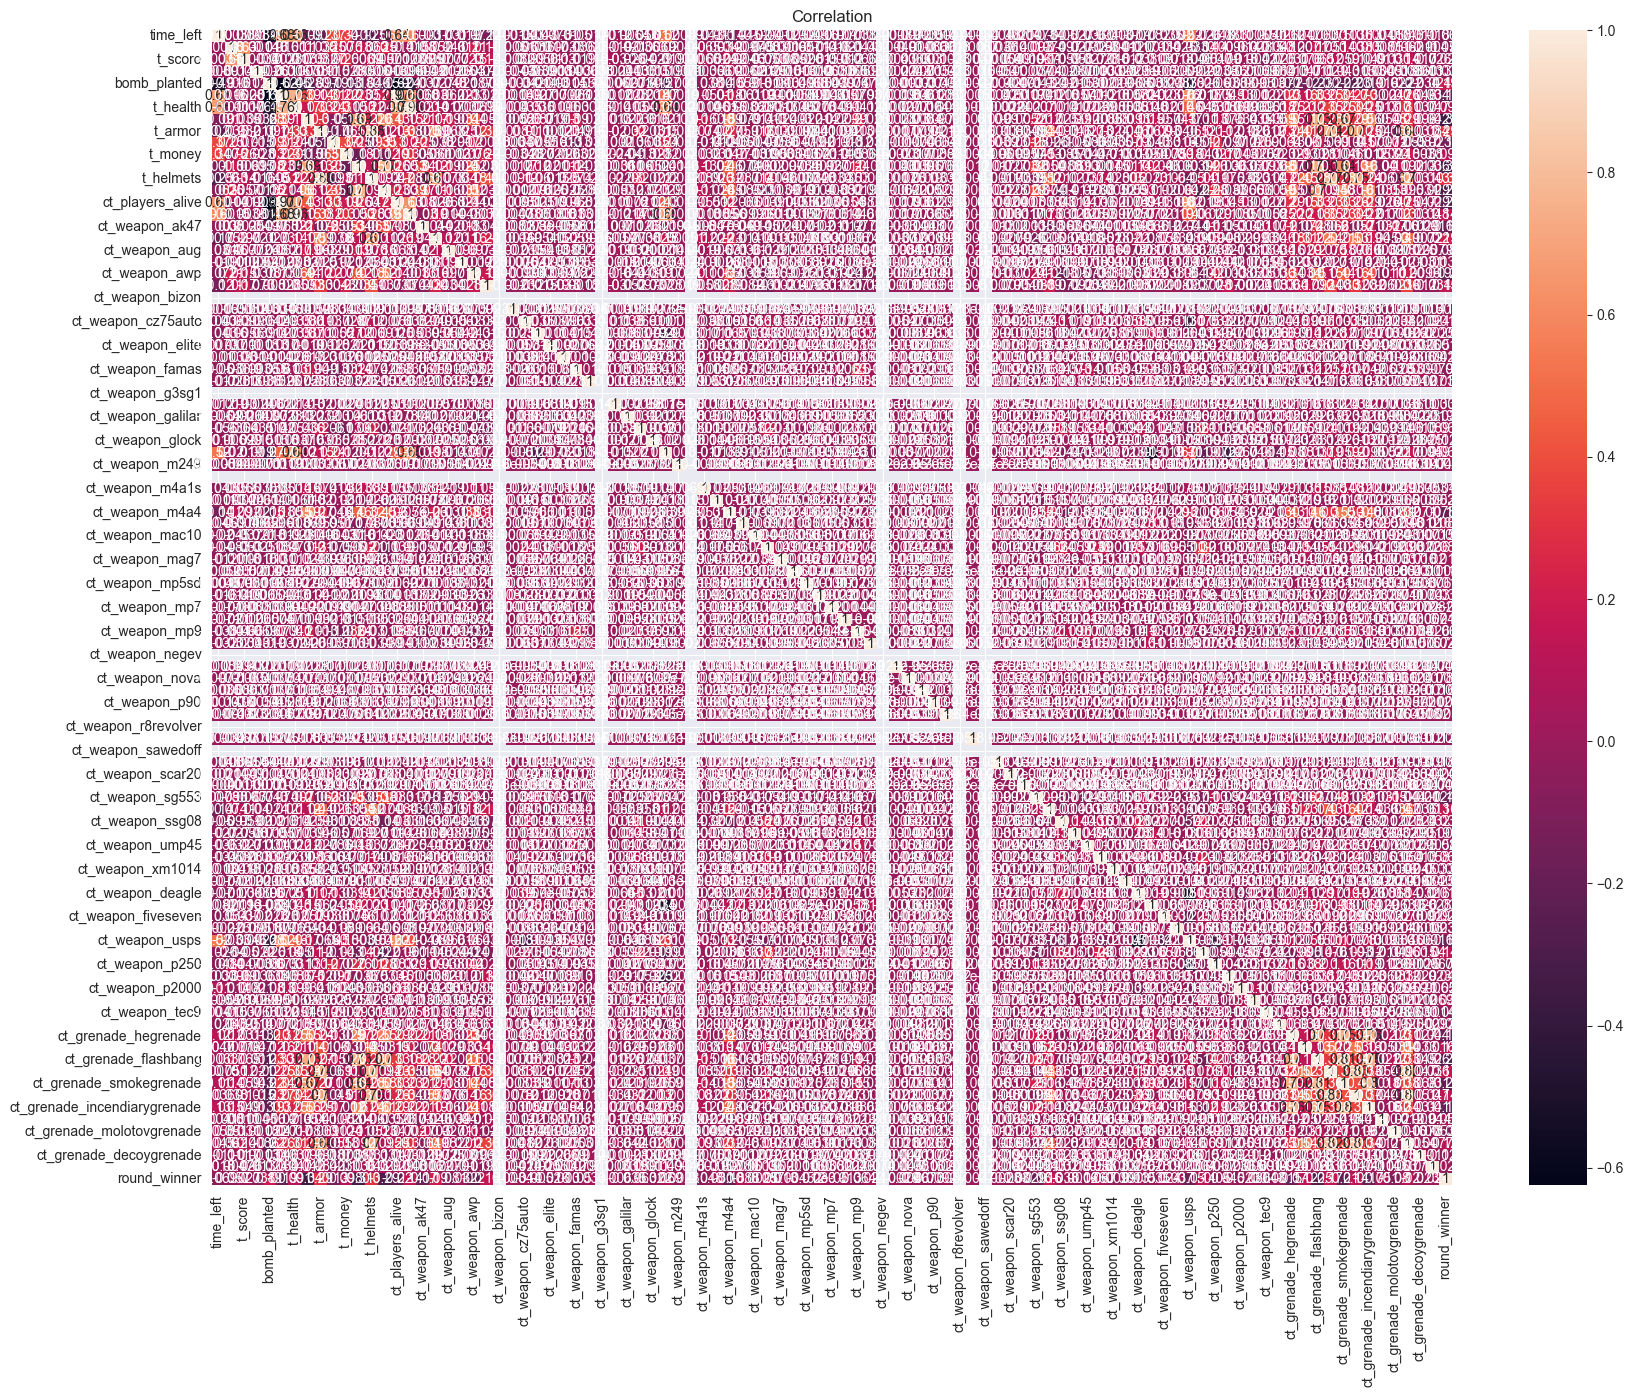

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation')
plt.show()

In [18]:
X = df.drop('round_winner', axis=1)
y = df['round_winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
def show_confusion_matrix(prediction, name):
    columns = ['CT', 'T']
    confusion = confusion_matrix(y_test, prediction)
    confusion_df = pd.DataFrame(confusion, index=columns, columns=columns)
    sns.heatmap(confusion_df, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [20]:
rf_classifier = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_classifier, param_grid={'n_estimators': [10, 50, 100, 200, 500]}, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

rf_model = rf_grid_search.best_estimator_
Y_pred = rf_model.predict(X_test)

print("Random Forest Classifier")
print('MSE: %.2f' % mean_squared_error(y_test, Y_pred))
print('R2 score: %.2f' % r2_score(y_test, Y_pred))
print('Accuracy score: %.2f' % accuracy_score(y_test, Y_pred))

Random Forest Classifier
MSE: 0.12
R2 score: 0.53
Accuracy score: 0.88


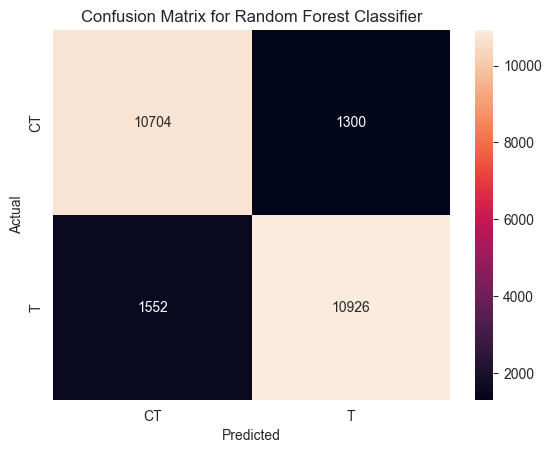

In [21]:
show_confusion_matrix(Y_pred, 'Random Forest Classifier')

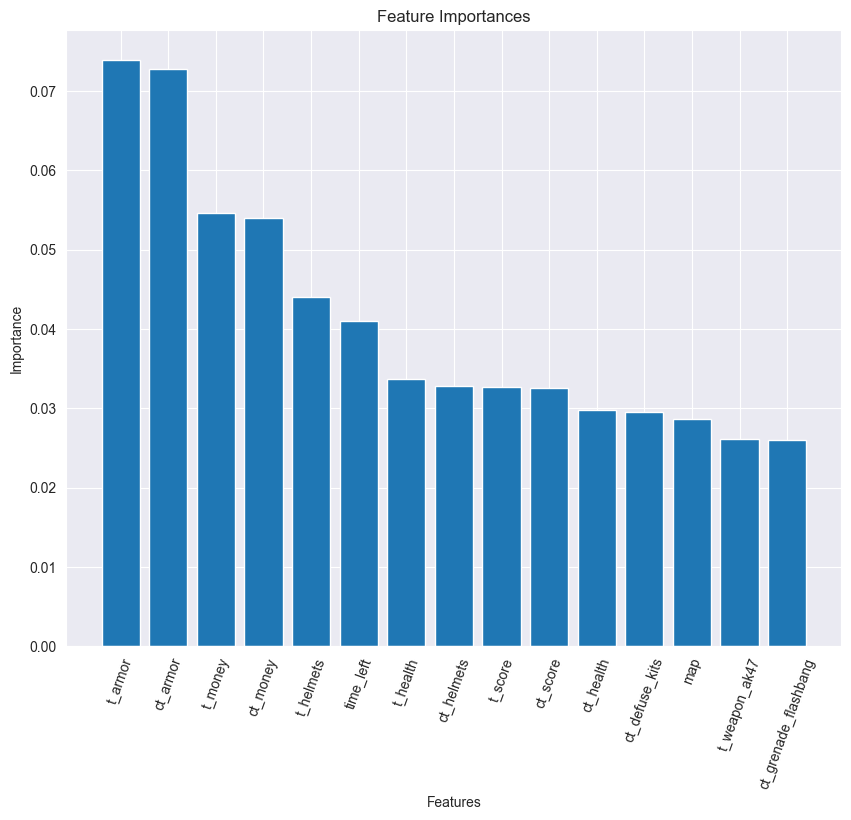

In [22]:
importance = rf_model.feature_importances_

def show_feature_importance(imp):
    sorted_indices = np.argsort(imp)[::-1]
    sorted_importance = importance[sorted_indices]
    nonzero_indices = np.nonzero(sorted_importance)
    sorted_importance = sorted_importance[nonzero_indices][:15]
    sorted_features = df.columns[:-1][sorted_indices][nonzero_indices][:15]
    plt.figure(figsize=(10, 8))
    plt.bar(range(len(sorted_features)), sorted_importance, tick_label=sorted_features)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.xticks(rotation=70)
    plt.show()

show_feature_importance(importance)

In [23]:
dt_classifier = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_classifier, {'max_depth': [i for i in range(40, 50)]}, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

dt_model = dt_grid_search.best_estimator_
Y_pred = dt_model.predict(X_test)

print("Decision Tree Classifier")
print('MSE: %.2f' % mean_squared_error(y_test, Y_pred))
print('R2 score: %.2f' % r2_score(y_test, Y_pred))
print('Accuracy score: %.2f' % accuracy_score(y_test, Y_pred))

Decision Tree Classifier
MSE: 0.18
R2 score: 0.28
Accuracy score: 0.82


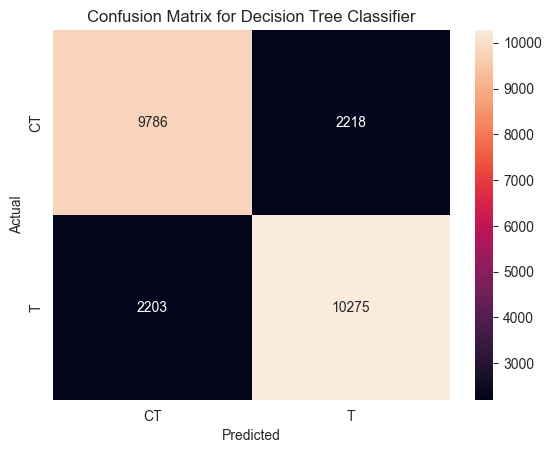

In [24]:
show_confusion_matrix(Y_pred, 'Decision Tree Classifier')

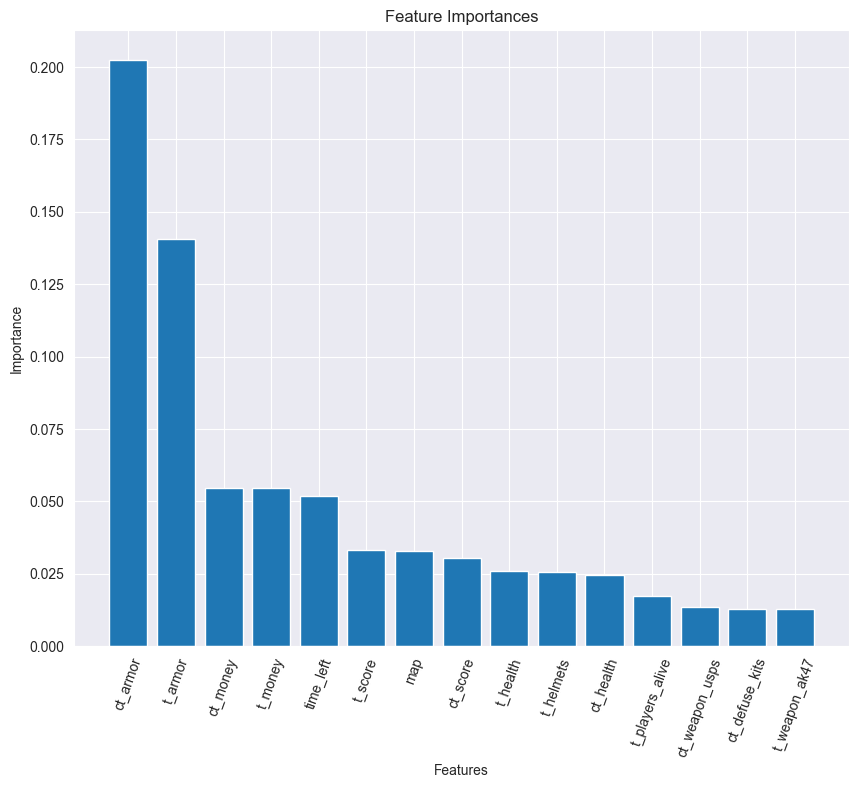

In [25]:
importance = dt_model.feature_importances_
show_feature_importance(importance)

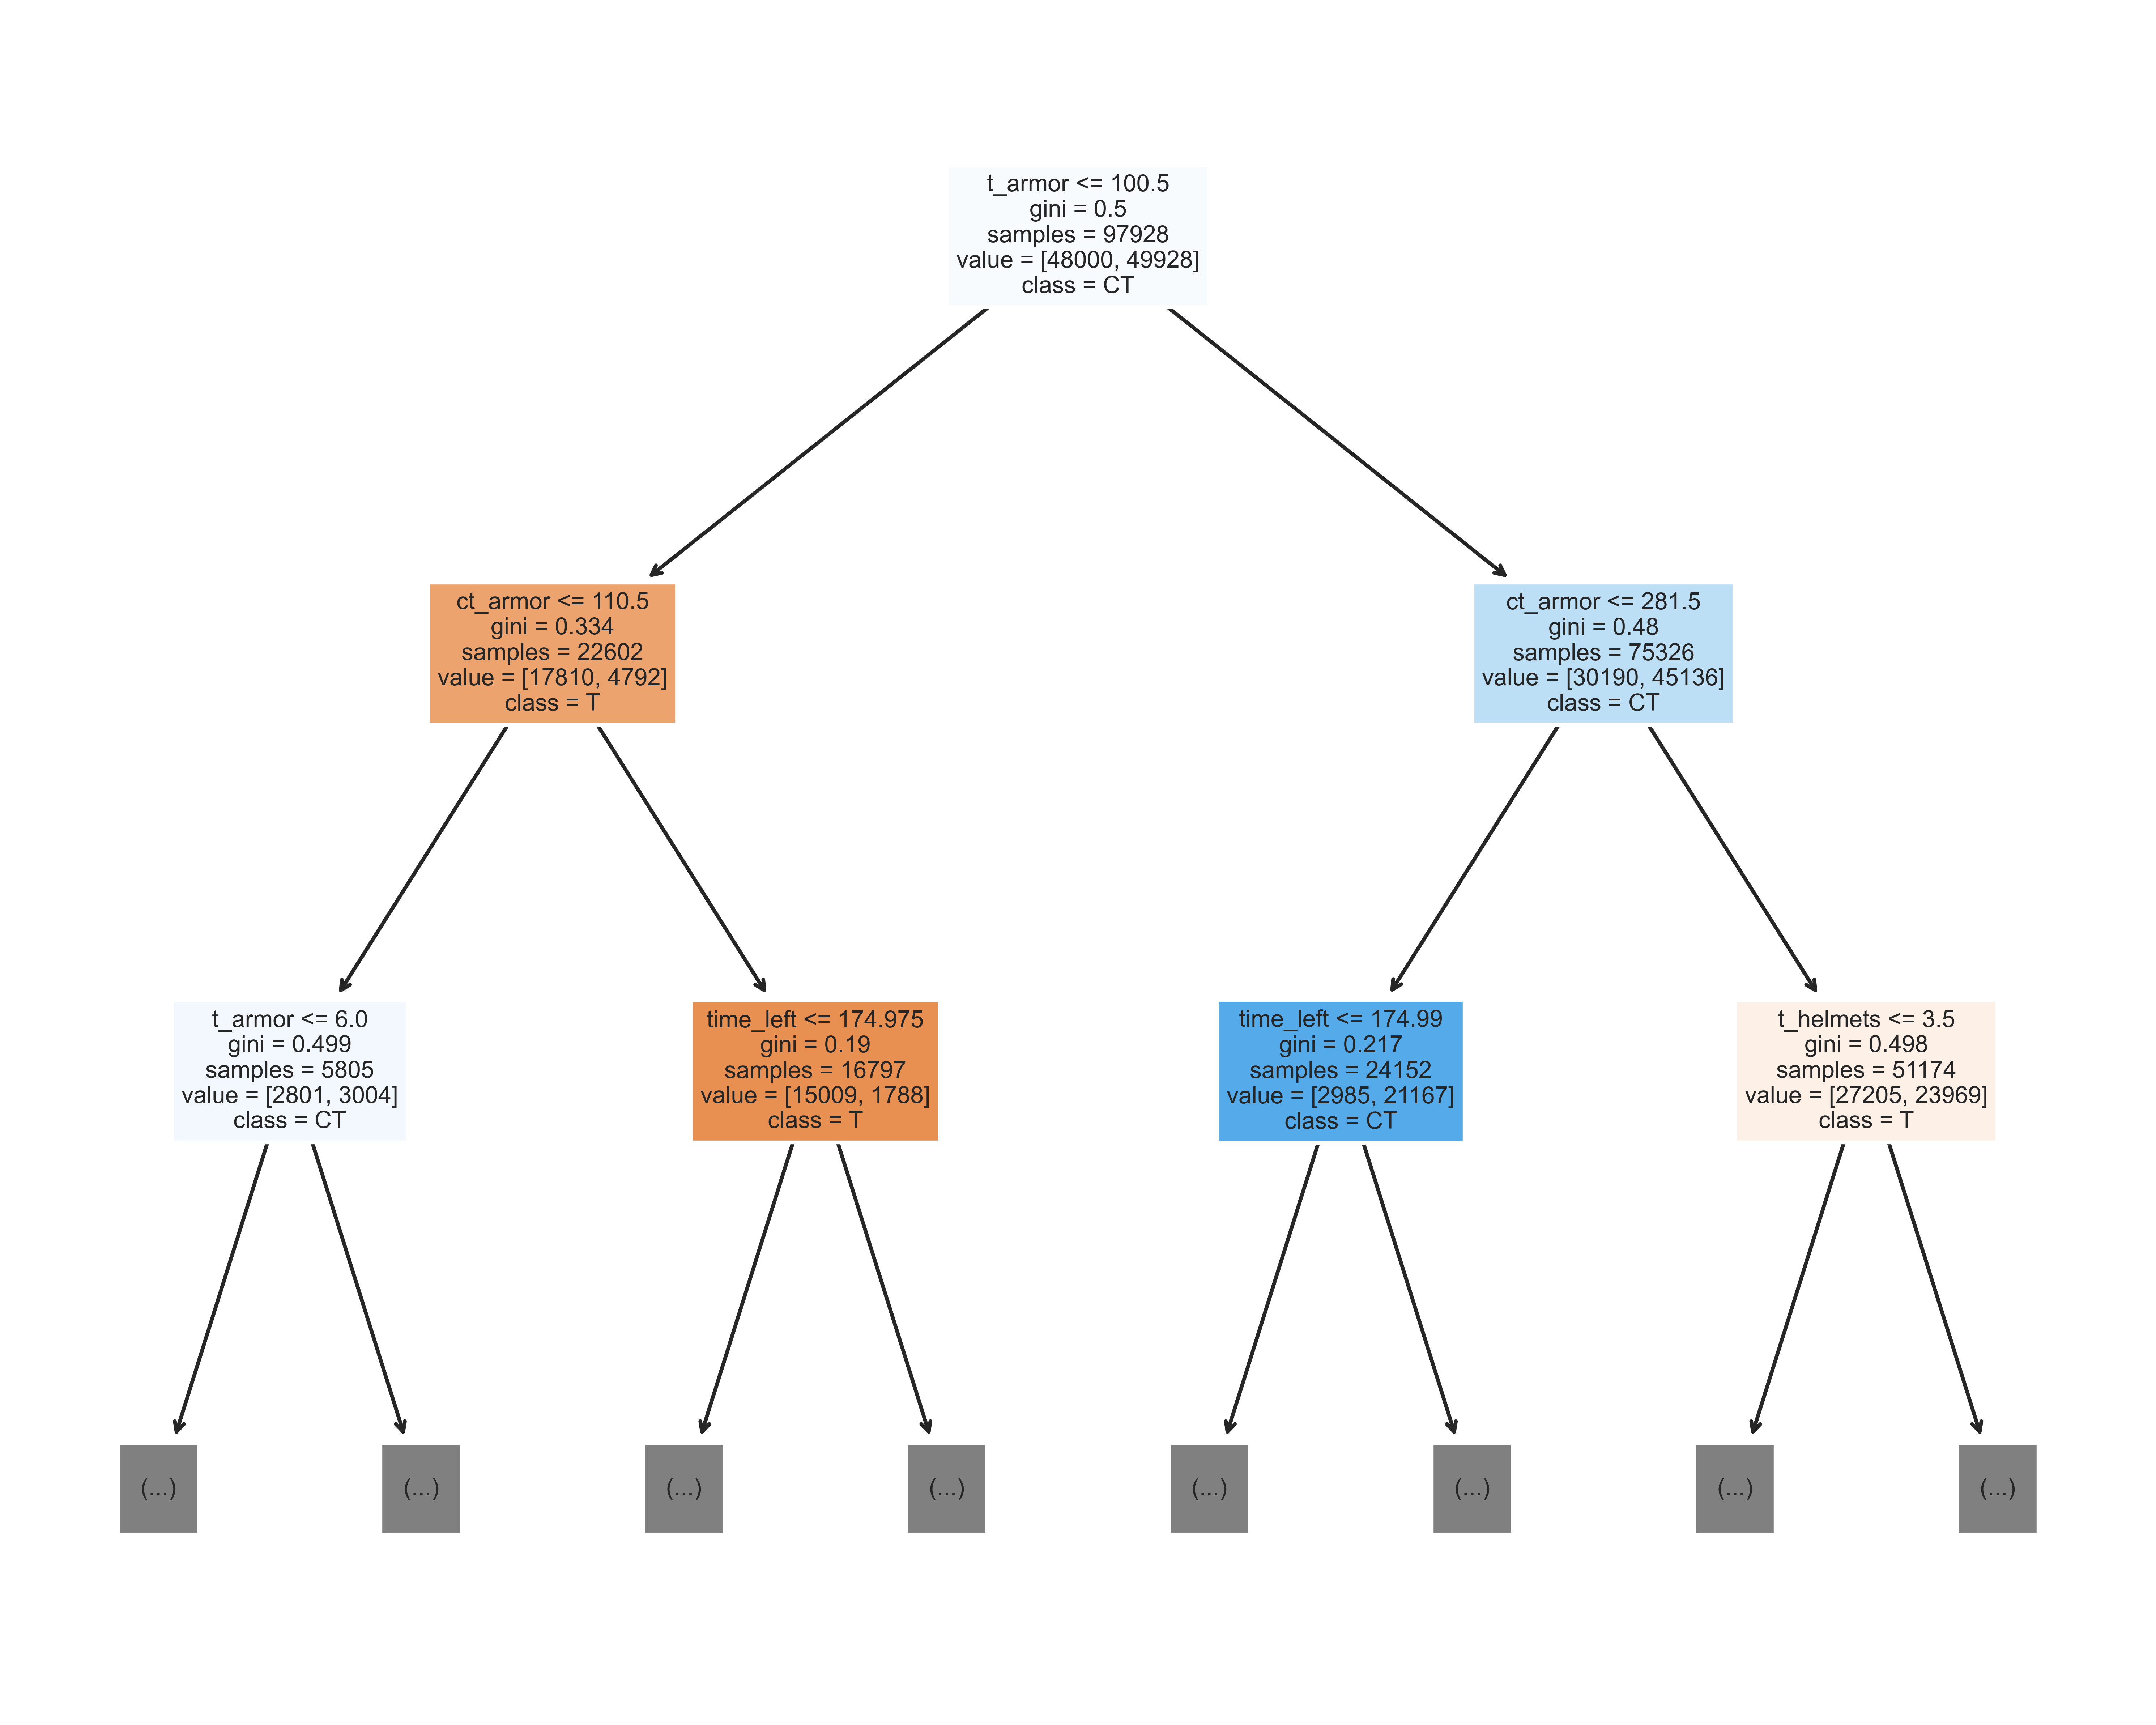

In [26]:
plt.figure(figsize=(10, 8), dpi=750)
plot_tree(dt_model, feature_names=df.columns[:-1], class_names=count.index, filled=True, max_depth=2)
plt.show()

In [27]:
kn_model_classifier = KNeighborsClassifier()
kn_model_grid_search = GridSearchCV(kn_model_classifier, {'n_neighbors': [1, 5, 10, 15]}, cv=5, scoring='accuracy')
kn_model_grid_search.fit(X_train, y_train)

kn_model = kn_model_grid_search.best_estimator_
Y_pred = kn_model.predict(X_test)

print("K Neighbors Classifier")
print('MSE: %.2f' % mean_squared_error(y_test, Y_pred))
print('R2 score: %.2f' % r2_score(y_test, Y_pred))
print('Accuracy score: %.2f' % accuracy_score(y_test, Y_pred))

K Neighbors Classifier
MSE: 0.18
R2 score: 0.26
Accuracy score: 0.82


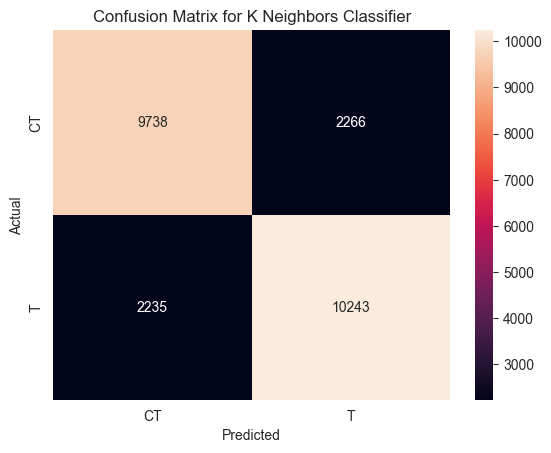

In [28]:
show_confusion_matrix(Y_pred, 'K Neighbors Classifier')